# DATA SCIENCE PROJECT TEMPLATES

## Regression
### Boston Housing data

In [1]:
# processing
import d6tflow, luigi, d6tpipe
import pandas as pd
import numpy as np
import pathlib

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import lightgbm
import warnings
from sklearn import metrics
#lightgbm.LGBMRegressor
import shap
#shap.initjs()

# project
# import cfg, tasks
# import importlib # optional
# importlib.reload(cfg)
# importlib.reload(tasks)
# importlib.reload(visualize)


Loading postgres module without psycopg2 installed. Will crash at runtime if postgres functionality is used.


Welcome to d6tflow!
Welcome to d6tpipe!


In [2]:
import d6tflow.pipes

d6tflow.pipes.init('intro-stat-learning',profile='default', reset=True) #, local_pipe=True
pipe = d6tflow.pipes.get_pipe()
pipe.pull()

No token provided. Register or login to connect to repo API.
Successfully connected to pipe intro-stat-learning.  Read only access
pulling: 0.00MB


0it [00:00, ?it/s]


[]

In [3]:
print('where files are stored:',pipe.dirpath)

where files are stored: C:\Users\32895\d6tpipe\files\default\intro-stat-learning


In [4]:
# tasks

class TaskProcessRawData1(d6tflow.tasks.TaskPqPandas):

    def run(self):        
        pipe=d6tpipe.PipeLocal('intro-stat-learning')
        df = pd.read_csv(pipe.dirpath/'boston_housing.csv',index_col=0)
        self.save(df)

@d6tflow.requires(TaskProcessRawData1)
class TaskFeatures(d6tflow.tasks.TaskPqPandas):
    factorize = luigi.BoolParameter(default=True)
    
    def run(self):
        df = self.inputLoad()
        if self.factorize:
            for col in ['CHAS','RAD']:
                df[col]=df[col].factorize()[0]
        df['target']=df['MEDV']
        df = df.dropna()
        self.save(df)

In [5]:
d6tflow.run([TaskFeatures()],forced_all=True,confirm=False)
df_train = TaskFeatures().outputLoad()

INFO: Informed scheduler that task   TaskFeatures_True_e0eded0c4b   has status   PENDING
INFO:luigi-interface:Informed scheduler that task   TaskFeatures_True_e0eded0c4b   has status   PENDING
INFO: Informed scheduler that task   TaskProcessRawData1__99914b932b   has status   DONE
INFO:luigi-interface:Informed scheduler that task   TaskProcessRawData1__99914b932b   has status   DONE
INFO: Done scheduling tasks
INFO:luigi-interface:Done scheduling tasks
INFO: Running Worker with 1 processes
INFO:luigi-interface:Running Worker with 1 processes
INFO: [pid 5712] Worker Worker(salt=917399384, workers=1, host=DESKTOP-8S61CGN, username=32895, pid=5712) running   TaskFeatures(factorize=True)
INFO:luigi-interface:[pid 5712] Worker Worker(salt=917399384, workers=1, host=DESKTOP-8S61CGN, username=32895, pid=5712) running   TaskFeatures(factorize=True)
INFO: [pid 5712] Worker Worker(salt=917399384, workers=1, host=DESKTOP-8S61CGN, username=32895, pid=5712) done      TaskFeatures(factorize=True)
IN

In [6]:
cfg_col_X_cat = ['CHAS','RAD']
cfg_col_X_num = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']
cfg_col_X = cfg_col_X_cat+cfg_col_X_num
cfg_col_Y = 'target'
cfg_col_cat = ['CHAS','RAD']

In [7]:
df_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'target'],
      dtype='object')

In [8]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,0,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,1,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,1,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,2,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,2,222,18.7,396.90,5.33,36.2,36.2


Boston House Price dataset has 14 features and their description is given as follows:

·CRIM per capita crime rate by town

·ZN proportion of residential land zoned for lots over 25,000 sq.ft.

·INDUS proportion of non-retail business acres per town

·CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

·NOX nitric oxides concentration (parts per 10 million)

·RM average number of rooms per dwelling

·AGE proportion of owner-occupied units built prior to 1940

·DIS weighted distances to five Boston employment centres

·RAD index of accessibility to radial highways

·TAX full-value property-tax rate per dollar 10,000.

·PTRATIO pupil-teacher ratio by town

·B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

·LSTAT % lower status of the population

·MEDV Median value of owner-occupied homes in $1000's

Here main thing to notice is that MEDV is the outcome variable which we need to predict and all other variables are predictor variables.

In [9]:
print('observations and type')
df_train.info()

observations and type
<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
target     506 non-null float64
dtypes: float64(12), int64(3)
memory usage: 63.2 KB


In [10]:
print('missing values')
df_train.apply(lambda x: x.isna().sum()/len(x))

missing values


CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
target     0.0
dtype: float64

In [11]:
print('unique values')
df_train.apply(lambda x: len(x.unique()))

unique values


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
target     229
dtype: int64

In [12]:
df_train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,4.62,408.24,18.46,356.67,12.65,22.53,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,2.44,168.54,2.16,91.29,7.14,9.20,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,0.00,187.00,12.60,0.32,1.73,5.00,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,3.00,279.00,17.40,375.38,6.95,17.02,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,4.00,330.00,19.05,391.44,11.36,21.20,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,8.00,666.00,20.20,396.22,16.96,25.00,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,8.00,711.00,22.00,396.90,37.97,50.00,50.00


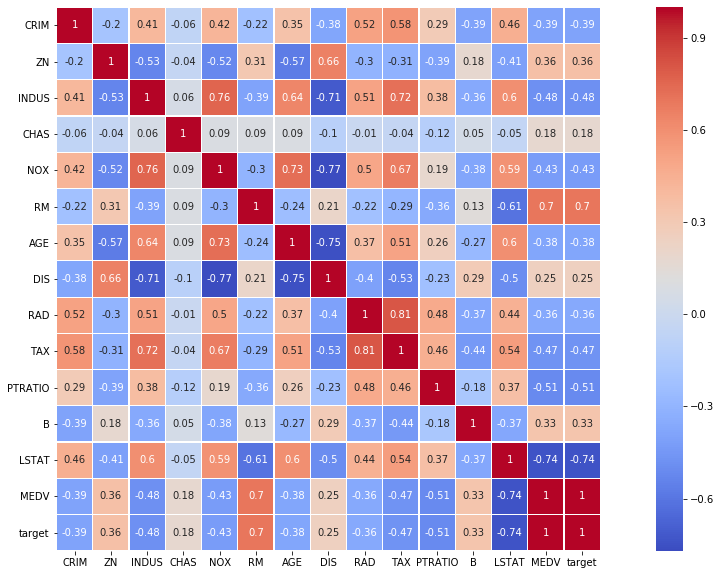

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=df_train.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

According to heatmap.INDUS, RM, TAX, PTRATIO and LSTAT, as well as CRIM present some correlation(either positive or negative). While there exists multicollinearity e.g.:INDUS shows relatively high correlation with NOX,TAX etc.

From my perspective,I think LSTAT,RM,PTR ratio are important features.1)increase in RM value increases MEDV value ie price of the home. 2) Lower the value of LSTAT higher the value of MEDV 3) PTRATIO decrease in the value increases MEDV.

### distribution of target variable

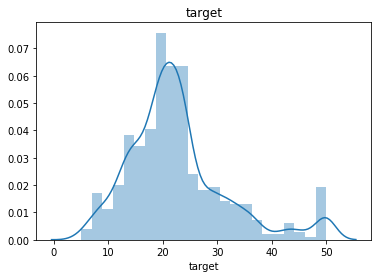

In [14]:
sns.distplot(df_train[cfg_col_Y]).set_title(cfg_col_Y);

### distribution of input variables

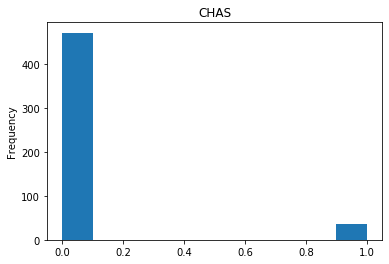

In [15]:
df_train['CHAS'].plot.hist(title='CHAS')

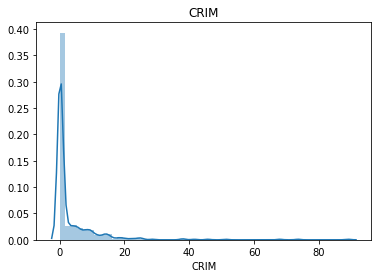

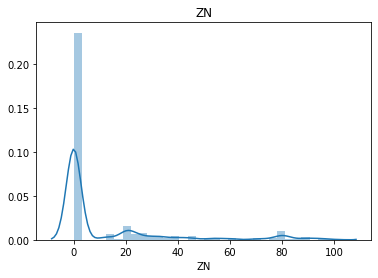

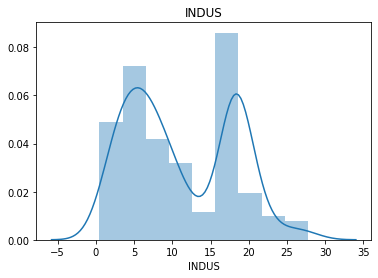

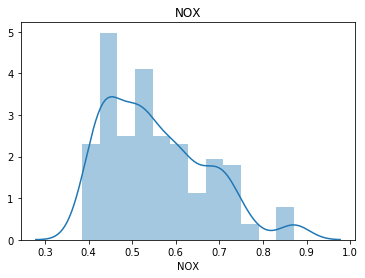

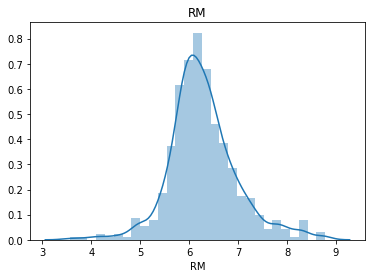

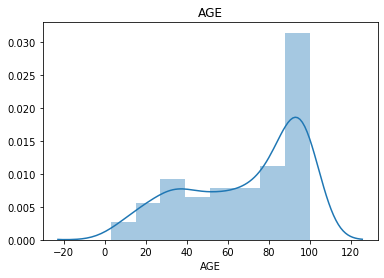

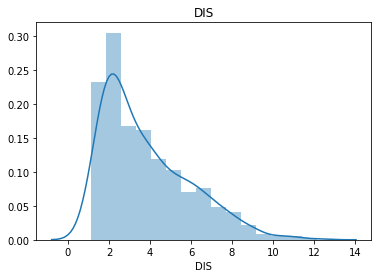

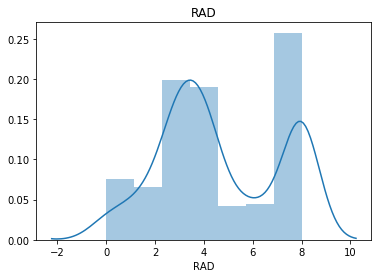

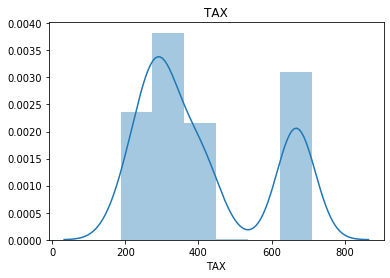

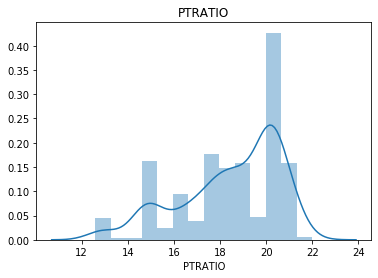

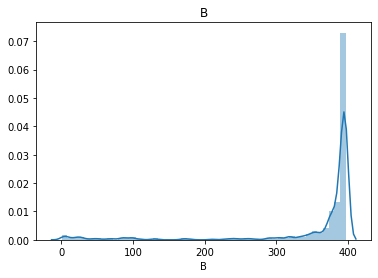

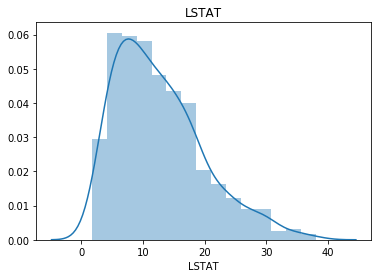

In [16]:
for icol in ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']:
    plt.figure();
    sns.distplot(df_train[icol]).set_title(icol);

### relation of inut variables to target variable

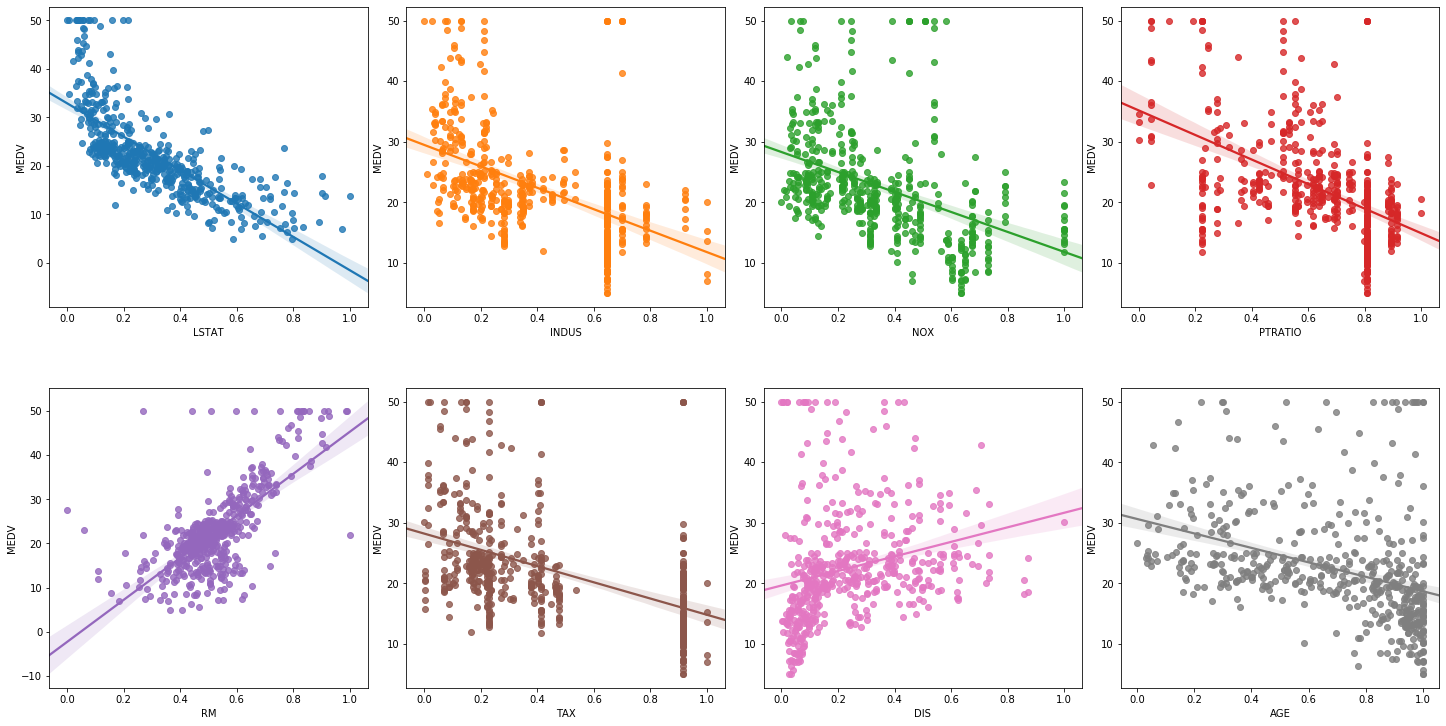

In [17]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df_train.loc[:,column_sels]
y = df_train['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [18]:
for icol in cfg_col_X_cat:
    print(icol)
    print(df_train.groupby(icol)['target'].agg(['mean','count']))


CHAS
           mean  count
CHAS                  
0     22.093843    471
1     28.440000     35
RAD
          mean  count
RAD                  
0    24.365000     20
1    26.833333     24
2    27.928947     38
3    25.706957    115
4    21.387273    110
5    30.358333     24
6    20.976923     26
7    27.105882     17
8    16.403788    132


## model training

In [19]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(df_train[cfg_col_X], df_train[cfg_col_Y], test_size=validation_size, random_state=seed)
df_trainX, df_trainY = df_train[cfg_col_X], df_train[cfg_col_Y]

In [20]:
df_train['target_naive1']=df_train['target'].mean()

In [21]:
# Test options and evaluation metric using R2 to keep the same with automl tools
num_folds = 10
seed = 1234
RSQ = 'r2'

In [22]:
mod_ols = sm.OLS(df_trainY,sm.add_constant(df_trainX))

res_ols = mod_ols.fit()
print(res_ols.summary())
df_train['target_ols']=res_ols.predict()

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 04 Jul 2020   Prob (F-statistic):          5.11e-132
Time:                        10:34:46   Log-Likelihood:                -1505.7
No. Observations:                 506   AIC:                             3039.
Df Residuals:                     492   BIC:                             3099.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4857      4.999      6.298      0.0

In [23]:
from sklearn.linear_model import LinearRegression

mod_skols = LinearRegression()
mod_skols.fit(df_trainX,df_trainY)
df_train['target_skols']=mod_skols.predict(df_trainX)

In [24]:
mod_lgbm = lightgbm.LGBMRegressor(max_depth=2,learning_rate=0.1,n_estimators=100,reg_alpha=1.0)
mod_lgbm.fit(df_trainX,df_trainY)
df_train['target_lgbm']=mod_lgbm.predict(df_trainX)

# Decision tree

In [25]:
#feature engineering
cfg_col_X_cat = ['CHAS','RAD']
cfg_col_X_num = ['CRIM','NOX','RM','DIS','TAX','PTRATIO','LSTAT']
cfg_col_X = cfg_col_X_cat+cfg_col_X_num

In [86]:
X_train,X_test,y_train,y_test = train_test_split(df_train[cfg_col_X], df_train[cfg_col_Y],test_size=0.2,random_state=1234)
mod_CART = DecisionTreeRegressor(random_state=0,min_samples_split=4,max_features=9,max_depth=30)
mod_CART.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [87]:
y_pred = mod_CART.predict(X_test)
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'Decision Tree R2')
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

Decision Tree R2
R^2 = 0.8857501951730132
Adjusted R^2 = 0.8745735838312427


# Random Forest

In [92]:
warnings.filterwarnings(action='ignore')
mod_RF = RandomForestRegressor(random_state=0,min_samples_split=4,max_features=9,max_depth=20)
mod_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [93]:
y_pred = mod_RF.predict(X_test)
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'Random Forest R2')
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

Random Forest R2
R^2 = 0.9186932175509765
Adjusted R^2 = 0.9107392931809634


In [101]:
models=[]
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('CART', DecisionTreeRegressor(random_state=0)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Random Forest',RandomForestRegressor(random_state=0)))
models.append(('XGBoost Random Forest',xgb.XGBRFRegressor(random_state=0)))


In [102]:
for name,model in models:
    mod=model
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    r2= metrics.r2_score(y_test,y_pred)
    N,p = X_test.shape
    adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
    print(name,f'R2')
    print(f'R^2 = {r2}')
    print(f'Adjusted R^2 = {adj_r2}')
    print('--------------------------------------------------')

LR R2
R^2 = 0.7794858711792204
Adjusted R^2 = 0.7579138368380571
--------------------------------------------------
LASSO R2
R^2 = 0.6850108663267511
Adjusted R^2 = 0.6541967119456724
--------------------------------------------------
CART R2
R^2 = 0.8853219419287515
Adjusted R^2 = 0.8741034362478685
--------------------------------------------------
KNN R2
R^2 = 0.7893028548938666
Adjusted R^2 = 0.7686911776552232
--------------------------------------------------
Random Forest R2
R^2 = 0.9131716902766367
Adjusted R^2 = 0.9046776164993512
--------------------------------------------------
XGBoost Random Forest R2
R^2 = 0.9029427331626289
Adjusted R^2 = 0.8934480005372338
--------------------------------------------------


# After tuning

In [133]:
warnings.filterwarnings(action='ignore')
mod_RF = KNeighborsRegressor(leaf_size=50,n_neighbors=3,p=2,metric='minkowski')
mod_RF.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=50, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [134]:
y_pred = mod_RF.predict(X_test)
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'Random Forest R2')
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

Random Forest R2
R^2 = 0.8185971044591087
Adjusted R^2 = 0.8008511690257607


In [136]:
models=[]
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('CART', DecisionTreeRegressor(random_state=0,min_samples_split=4,max_features=9)))
models.append(('KNN', KNeighborsRegressor(leaf_size=50,n_neighbors=3,p=2,metric='minkowski')))
models.append(('Random Forest',RandomForestRegressor(random_state=0,min_samples_split=4,max_features=9,max_depth=20)))
models.append(('XGBoost Random Forest',xgb.XGBRFRegressor(random_state=0,min_samples_split=4,max_depth=20)))


In [137]:
warnings.filterwarnings(action='ignore')
for name,model in models:
    mod=model
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    r2= metrics.r2_score(y_test,y_pred)
    N,p = X_test.shape
    adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
    print(name,f'R2')
    print(f'R^2 = {r2}')
    print(f'Adjusted R^2 = {adj_r2}')
    print('--------------------------------------------------')

LR R2
R^2 = 0.7794858711792204
Adjusted R^2 = 0.7579138368380571
--------------------------------------------------
LASSO R2
R^2 = 0.6850108663267511
Adjusted R^2 = 0.6541967119456724
--------------------------------------------------
CART R2
R^2 = 0.8857501951730132
Adjusted R^2 = 0.8745735838312427
--------------------------------------------------
KNN R2
R^2 = 0.8185971044591087
Adjusted R^2 = 0.8008511690257607
--------------------------------------------------
Random Forest R2
R^2 = 0.9186932175509765
Adjusted R^2 = 0.9107392931809634
--------------------------------------------------
[18:46:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost 

## model evaluation

### prediction errors: in-sample

In [32]:
from sklearn.metrics import mean_squared_error
print('naive mean',mean_squared_error(df_train[cfg_col_Y],df_train['target_naive1']))
print('ols',mean_squared_error(df_train[cfg_col_Y],df_train['target_skols']))
print('gbm',mean_squared_error(df_train[cfg_col_Y],df_train['target_lgbm']))

naive mean 84.41955615616554
ols 22.498115387777307
gbm 6.74207188456887


### prediction errors: cross-validation

In [33]:
print('ols',-cross_validate(mod_skols, df_trainX, df_trainY, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'), cv=10)['test_neg_mean_squared_error'].mean())
print('gbm',-cross_validate(mod_lgbm, df_trainX, df_trainY, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'), cv=10)['test_neg_mean_squared_error'].mean())

ols 35.226694202780536
gbm 20.496549603742576


In [49]:
for name,model in models:
    mod=model
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    print(name+' MSE',-cross_validate(mod, df_trainX, df_trainY, return_train_score=False, 
    scoring=('r2', 'neg_mean_squared_error'), cv=10)['test_neg_mean_squared_error'].mean())
    print('--------------------------------------------------')
    

LR MSE 35.226694202780536
--------------------------------------------------
LASSO MSE 35.87796543876441
--------------------------------------------------
CART MSE 41.95699882352942
--------------------------------------------------
KNN MSE 107.78835807058822
--------------------------------------------------
Random Forest MSE 24.42952254509804
--------------------------------------------------
XGBoost Random Forest MSE 22.587352950033054
--------------------------------------------------


In [34]:
results = []
names = []
num_folds = 10
seed = 7
R2 = 'r2'
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=R2)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('--------------------------------------------------')

LR: -0.083174 (0.070546)
--------------------------------------------------
LASSO: -0.039013 (0.058747)
--------------------------------------------------
CART: -1.405242 (0.865457)
--------------------------------------------------
KNN: -0.275255 (0.215414)
--------------------------------------------------
Random Forest: -0.392862 (0.227168)
--------------------------------------------------
XGBoost Random Forest: -0.219685 (0.173166)
--------------------------------------------------


In [35]:
for name,model in models:
    mod=model
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    mse = metrics.mean_squared_error(y_test,y_pred)
    mae = metrics.mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print(name,f'Evaluation')
    print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')
    print('--------------------------------------------------')

LR Evaluation
Mean Squared Error: 22.635517590676557
Mean Absolute Error: 3.6048077754965564
Root Mean Squared Error: 4.7576798537392735
--------------------------------------------------
LASSO Evaluation
Mean Squared Error: 32.333266418169394
Mean Absolute Error: 4.089239578344186
Root Mean Squared Error: 5.686234819119713
--------------------------------------------------
CART Evaluation
Mean Squared Error: 11.77156862745098
Mean Absolute Error: 2.627450980392157
Root Mean Squared Error: 3.430971965413151
--------------------------------------------------
KNN Evaluation
Mean Squared Error: 21.6278156862745
Mean Absolute Error: 3.3127450980392155
Root Mean Squared Error: 4.650571544044291
--------------------------------------------------
Random Forest Evaluation
Mean Squared Error: 8.91282450980392
Mean Absolute Error: 2.0569607843137256
Root Mean Squared Error: 2.985435397024012
--------------------------------------------------
XGBoost Random Forest Evaluation
Mean Squared Error: 9

## model interpretation

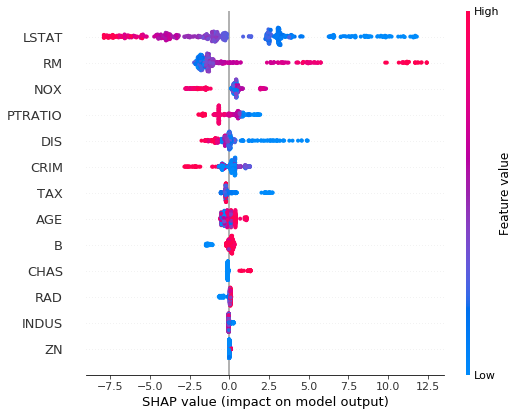

In [36]:
explainer = shap.TreeExplainer(mod_lgbm, df_trainX)
shap_values = explainer.shap_values(df_trainX)

shap.summary_plot(shap_values, df_trainX)


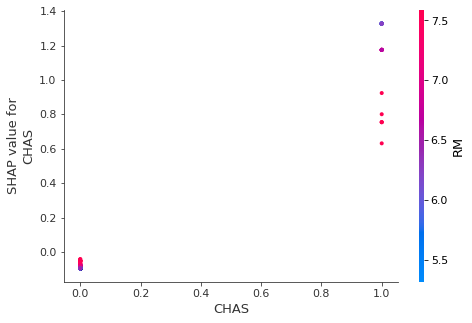

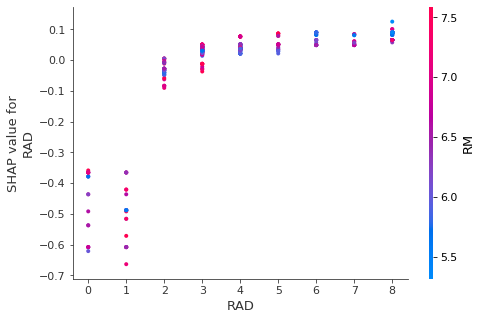

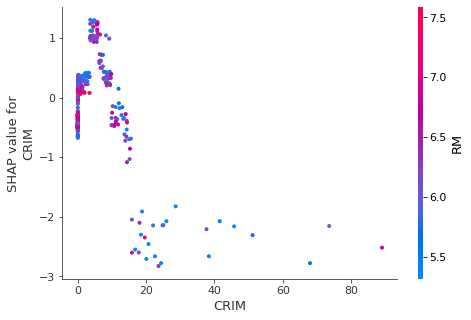

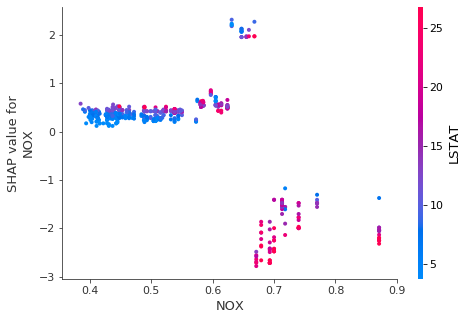

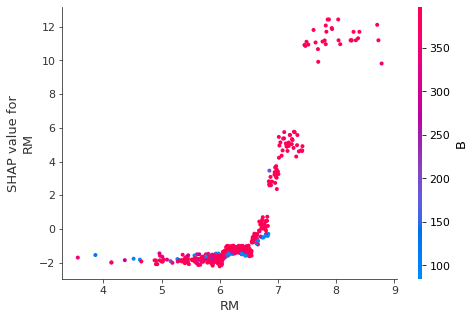

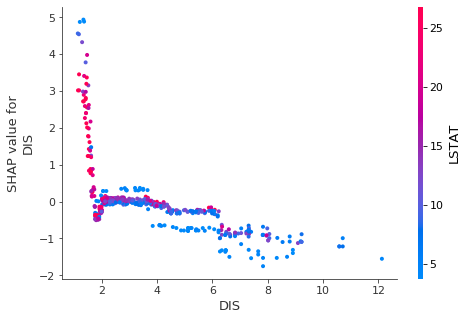

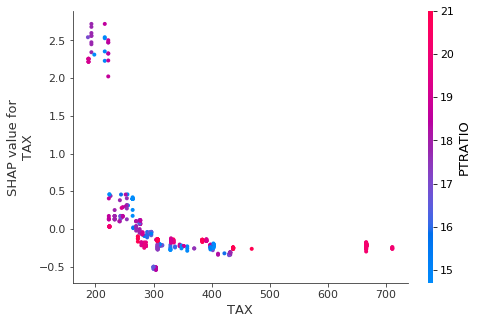

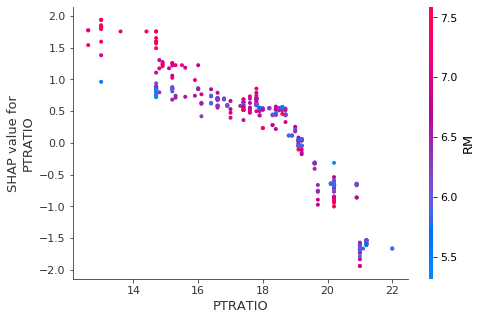

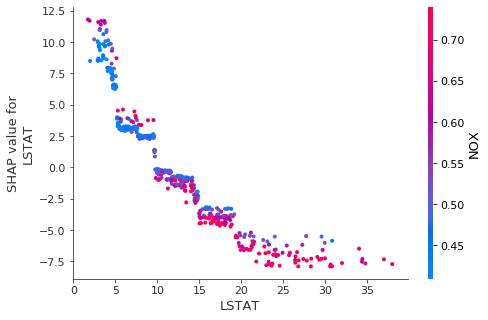

In [37]:
for col in cfg_col_X:
    shap.dependence_plot(col, shap_values, df_trainX)#,interaction_index=None)

In [38]:
dict(zip(cfg_col_X,range(len(cfg_col_X))))

{'CHAS': 0,
 'RAD': 1,
 'CRIM': 2,
 'NOX': 3,
 'RM': 4,
 'DIS': 5,
 'TAX': 6,
 'PTRATIO': 7,
 'LSTAT': 8}

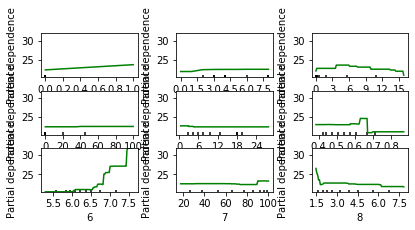

In [39]:
plot_partial_dependence(mod_lgbm, df_trainX, range(len(cfg_col_X))) 

In [40]:
features=[0,1,2,3,4,5,6,7,8,9,10,11,12]
names=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','CHAS','RAD']

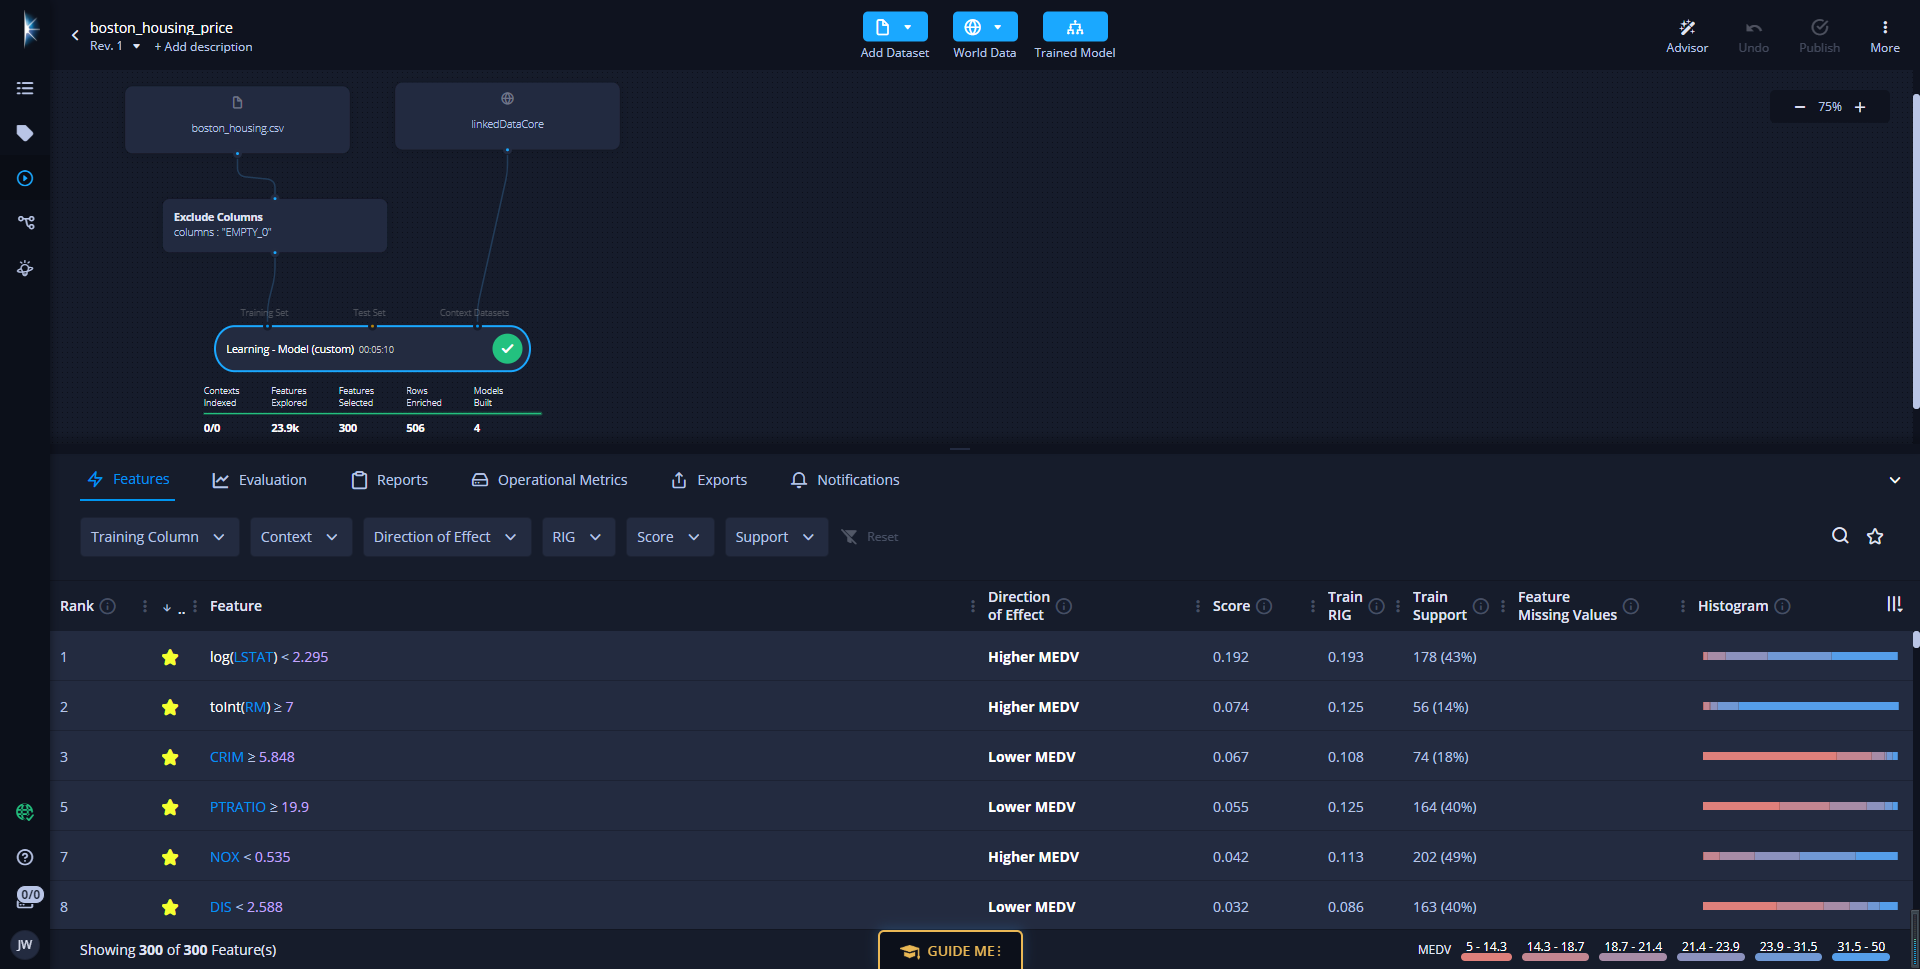

In [41]:
from IPython.display import Image
Image(filename = 'C:/Users/32895/Downloads/Boston_housing_sparkbeyond.png', width=1000, height=600)

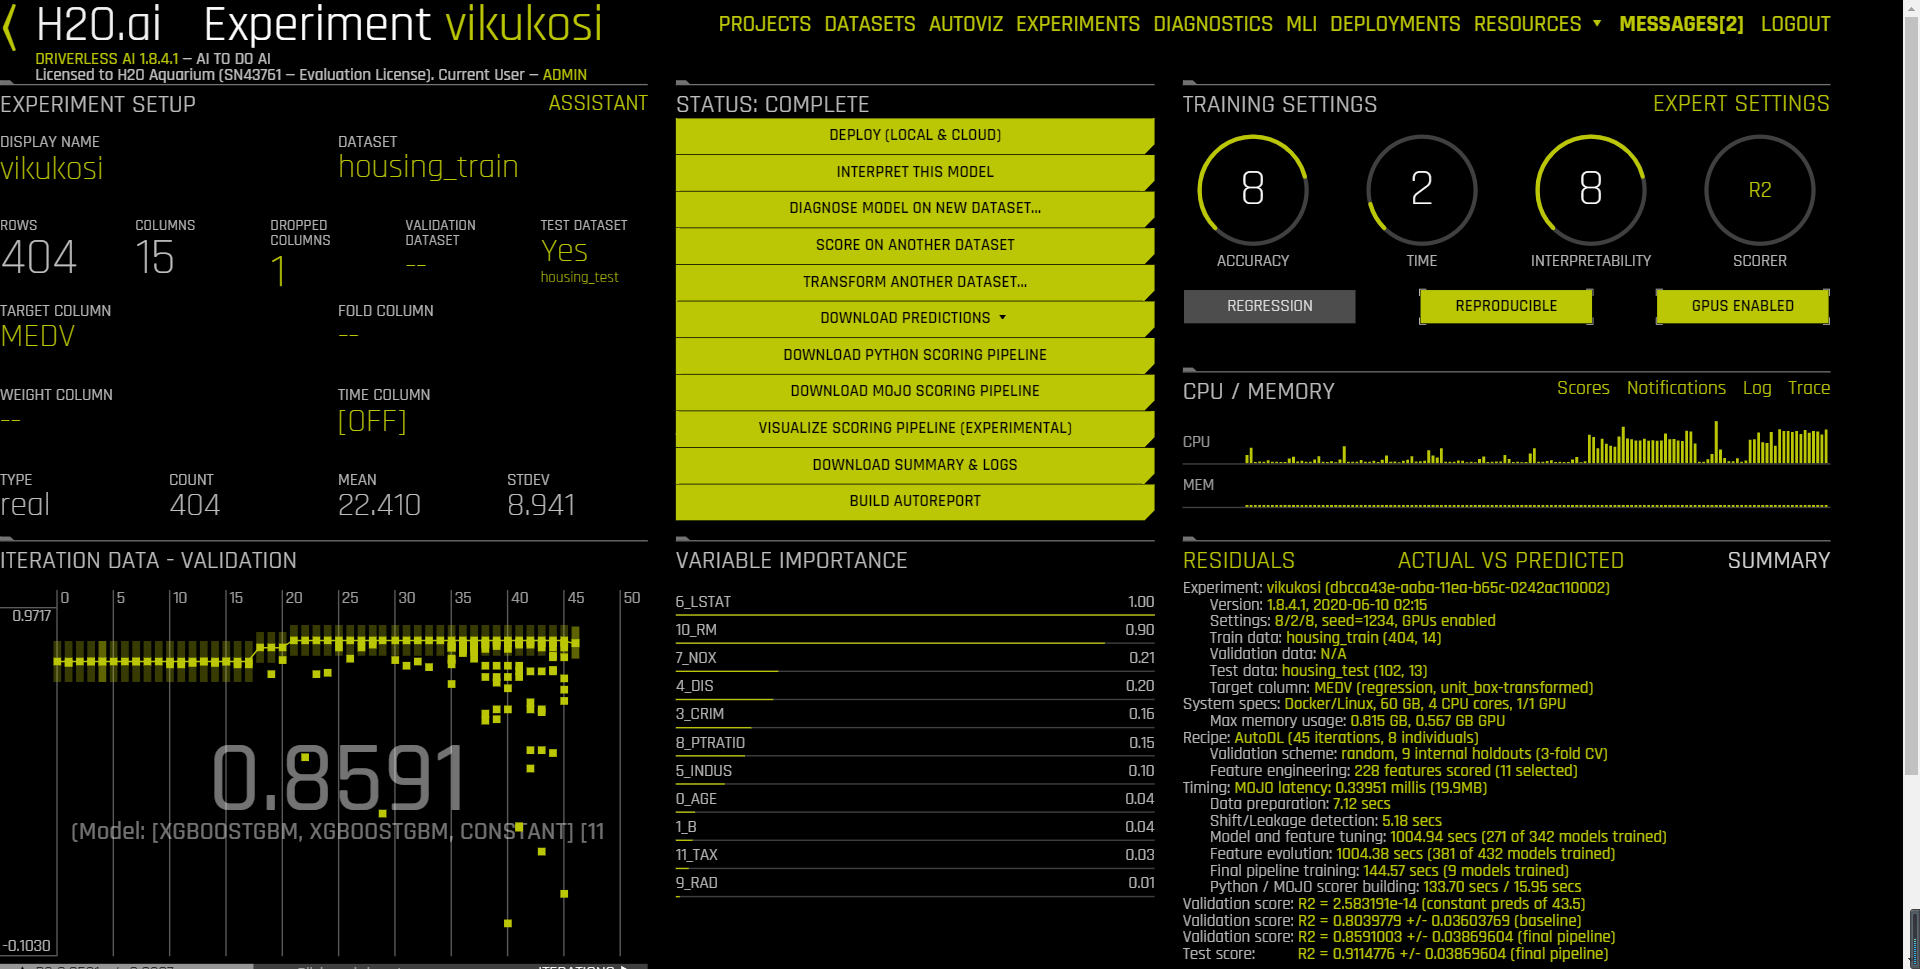

In [42]:
Image(filename = 'C:/Users/32895/Downloads/Boston_housing_h2o.png', width=1000, height=600)